In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.spatial.distance as dt
import scipy.stats as stats
import pandas as pd

In [2]:
# read data into memory
data_set_images = np.genfromtxt("hw07_data_set_images.csv", delimiter = ",")
data_set_labels = np.genfromtxt("hw07_data_set_labels.csv", delimiter = ",")

#define train data (25 x 5)
trainingdata_images = data_set_images[:2000]
trainingdata_labels = data_set_labels[:2000].astype(int)       
    
#define test data (14 x 5)
testdata_images = data_set_images[2000:]   
testdata_labels = data_set_labels[2000:].astype(int)

# get number of samples and number of features
N = len(trainingdata_images)
K = np.max(trainingdata_labels)

print(K)

10


In [3]:
#class means for training data
class_means_train = np.zeros((10,784))
sum1 =np.zeros((1,784))
sum2 =np.zeros((1,784))
sum3 =np.zeros((1,784))
sum4 =np.zeros((1,784))
sum5 =np.zeros((1,784))
sum6 =np.zeros((1,784))
sum7 =np.zeros((1,784))
sum8 =np.zeros((1,784))
sum9 =np.zeros((1,784))
sum10 =np.zeros((1,784))
mean1 =np.zeros((1,784))
mean2 =np.zeros((1,784))
mean3 =np.zeros((1,784))
mean4 =np.zeros((1,784))
mean5 =np.zeros((1,784))
mean6 =np.zeros((1,784))
mean7 =np.zeros((1,784))
mean8 =np.zeros((1,784))
mean9 =np.zeros((1,784))
mean10 =np.zeros((1,784))
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
count10 = 0

for n in range (N):
    if trainingdata_labels[n] == 1:
        count1 = count1 + 1
        sum1 = np.add(sum1, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 2:
        count2 = count2 + 1
        sum2 = np.add(sum2, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 3:
        count3 = count3 + 1
        sum3 = np.add(sum3, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 4:
        count4 = count4 + 1
        sum4 = np.add(sum4, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 5:
        count5 = count5 + 1
        sum5 = np.add(sum5, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 6:
        count6 = count6 + 1
        sum6 = np.add(sum6, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 7:
        count7 = count7 + 1
        sum7 = np.add(sum7, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 8:
        count8 = count8 + 1
        sum8 = np.add(sum8, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 9:
        count9 = count9 + 1
        sum9 = np.add(sum9, trainingdata_images[n]) 
    elif trainingdata_labels[n] == 10:
        count10 = count10 + 1
        sum10 = np.add(sum10, trainingdata_images[n]) 

mean1 = sum1/count1
mean2 = sum2/count2  
mean3 = sum3/count3 
mean4 = sum4/count4  
mean5 = sum5/count5
mean6 = sum6/count6 
mean7 = sum7/count7  
mean8 = sum8/count8  
mean9 = sum9/count9 
mean10 = sum10/count10  
class_means_train[0] = mean1
class_means_train[1] = mean2
class_means_train[2] = mean3
class_means_train[3] = mean4
class_means_train[4] = mean5
class_means_train[5] = mean6
class_means_train[6] = mean7
class_means_train[7] = mean8
class_means_train[8] = mean9
class_means_train[9] = mean10
#sorry for this mess        


#class mean for all data for train data
class_means_all_data_train = np.mean(trainingdata_images,axis=0)

In [4]:
#class means for test data
class_means_test = np.zeros((10,784))
sumtest1 =np.zeros((1,784))
sumtest2 =np.zeros((1,784))
sumtest3 =np.zeros((1,784))
sumtest4 =np.zeros((1,784))
sumtest5 =np.zeros((1,784))
sumtest6 =np.zeros((1,784))
sumtest7 =np.zeros((1,784))
sumtest8 =np.zeros((1,784))
sumtest9 =np.zeros((1,784))
sumtest10 =np.zeros((1,784))
meantest1 =np.zeros((1,784))
meantest2 =np.zeros((1,784))
meantest3 =np.zeros((1,784))
meantest4 =np.zeros((1,784))
meantest5 =np.zeros((1,784))
meantest6 =np.zeros((1,784))
meantest7 =np.zeros((1,784))
meantest8 =np.zeros((1,784))
meantest9 =np.zeros((1,784))
meantest10 =np.zeros((1,784))
counttest1 = 0
counttest2 = 0
counttest3 = 0
counttest4 = 0
counttest5 = 0
counttest6 = 0
counttest7 = 0
counttest8 = 0
counttest9 = 0
counttest10 = 0

for n in range (N):
    if testdata_labels[n] == 1:
        counttest1 = counttest1 + 1
        sumtest1 = np.add(sumtest1, testdata_images[n]) 
    elif testdata_labels[n] == 2:
        counttest2 = counttest2 + 1
        sumtest2 = np.add(sumtest2, testdata_images[n]) 
    elif testdata_labels[n] == 3:
        counttest3 = counttest3 + 1
        sumtest3 = np.add(sumtest3, testdata_images[n]) 
    elif testdata_labels[n] == 4:
        counttest4 = counttest4 + 1
        sumtest4 = np.add(sumtest4, testdata_images[n]) 
    elif testdata_labels[n] == 5:
        counttest5 = counttest5 + 1
        sumtest5 = np.add(sumtest5, testdata_images[n]) 
    elif testdata_labels[n] == 6:
        counttest6 = counttest6 + 1
        sumtest6 = np.add(sumtest6, testdata_images[n]) 
    elif testdata_labels[n] == 7:
        counttest7 = counttest7 + 1
        sumtest7 = np.add(sumtest7, testdata_images[n]) 
    elif testdata_labels[n] == 8:
        counttest8 = counttest8 + 1
        sumtest8 = np.add(sumtest8, testdata_images[n]) 
    elif testdata_labels[n] == 9:
        counttest9 = counttest9 + 1
        sumtest9 = np.add(sumtest9, testdata_images[n]) 
    elif testdata_labels[n] == 10:
        counttest10 = counttest10 + 1
        sumtest10 = np.add(sumtest10, testdata_images[n]) 

meantest1 = sumtest1/counttest1
meantest2 = sumtest2/counttest2  
meantest3 = sumtest3/counttest3 
meantest4 = sumtest4/counttest4  
meantest5 = sumtest5/counttest5
meantest6 = sumtest6/counttest6 
meantest7 = sumtest7/counttest7  
meantest8 = sumtest8/counttest8  
meantest9 = sumtest9/counttest9 
meantest10 = sumtest10/counttest10  
class_means_test[0] = meantest1
class_means_test[1] = meantest2
class_means_test[2] = meantest3
class_means_test[3] = meantest4
class_means_test[4] = meantest5
class_means_test[5] = meantest6
class_means_test[6] = meantest7
class_means_test[7] = meantest8
class_means_test[8] = meantest9
class_means_test[9] = meantest10


#class mean for all data for test data
class_means_all_data_test = np.mean(testdata_images,axis=0)    

In [5]:
#SW and SB

#SW
S_W = np.zeros((784,784))
for i in range (N):
    for c in range (K):
        if trainingdata_labels[i] == c+1:
                S_W += np.outer((trainingdata_images[i]-class_means_train[c]),((trainingdata_images[i]-class_means_train[c]).T))
print(S_W[0:4, 0:4])
                
#SB
S_B = np.zeros((784,784))
for i in range (N):
    for c in range (K):
        if trainingdata_labels[i] == c+1:
                S_B += np.outer((class_means_train[c]-class_means_all_data_train),((class_means_train[c]-class_means_all_data_train).T))
                
print(S_B[0:4, 0:4])

[[  195.0531401    138.98550725   138.24154589   273.64251208]
 [  138.98550725   146.68407152   137.97108222   212.80522823]
 [  138.24154589   137.97108222   237.79940915   222.04558827]
 [  273.64251208   212.80522823   222.04558827 10381.73114607]]
[[ 0.8488599   0.86049275  1.26145411  4.64248792]
 [ 0.86049275  1.07392848  2.24791778  8.49977177]
 [ 1.26145411  2.24791778  6.68009085 25.25691173]
 [ 4.64248792  8.49977177 25.25691173 97.25635393]]


In [6]:
# calculate the SW-1SB
Sigma_X = np.dot(np.linalg.inv(S_W), S_B)

# calculate the eigenvalues and eigenvectors
values, vectors = linalg.eig(Sigma_X)
values = np.real(values)
vectors = np.real(vectors)

print(values[0:9])

[26.03085646 11.57909822  7.86259994  5.12082313  3.60002676  3.22503144
  2.71288241  1.3688596   1.13340931]


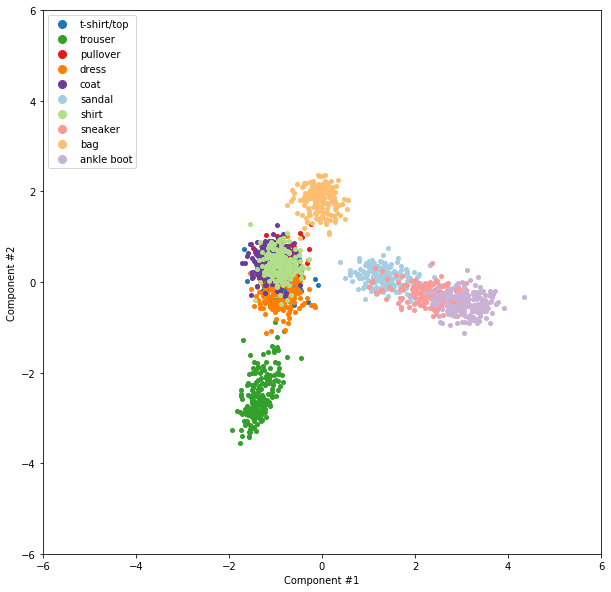

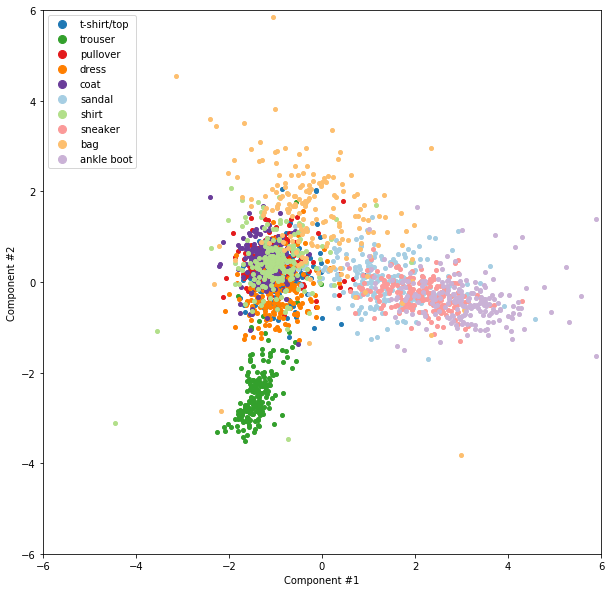

In [7]:
# calculate two-dimensional projections
Z_train = np.zeros((2000,2))
for i in range (N):
    Z_train[i] = np.matmul(np.transpose(vectors[:,[0, 1]]), (trainingdata_images[i] - class_means_all_data_train))

Z_test = np.zeros((2000,2))
for i in range (N):
    Z_test[i] = np.matmul(np.transpose(vectors[:,[0, 1]]), (testdata_images[i] - class_means_all_data_test)) 

# plot two-dimensional projections for train data
plt.figure(figsize = (10, 10))
point_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6"])
for c in range(K):
    plt.plot(Z_train[trainingdata_labels == c + 1, 0], Z_train[trainingdata_labels == c + 1, 1], marker = "o", markersize = 4, linestyle = "none", color = point_colors[c])
plt.legend(["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"],
           loc = "upper left", markerscale = 2)
plt.xlabel("Component #1")
plt.ylabel("Component #2")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.show()

# plot two-dimensional projections for test data
plt.figure(figsize = (10, 10))
point_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6"])
for c in range(K):
    plt.plot(Z_test[testdata_labels == c + 1, 0], Z_test[testdata_labels == c + 1, 1], marker = "o", markersize = 4, linestyle = "none", color = point_colors[c])
plt.legend(["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"],
           loc = "upper left", markerscale = 2)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("Component #1")
plt.ylabel("Component #2")
plt.show()

In [8]:
def find_i_of_smallest(lst, k):
    arr = np.array(lst)
    idx = np.argpartition(arr.ravel(), k)
    return tuple(np.array(np.unravel_index(idx, arr.shape))[:, range(min(k, 0), max(k, 0))])

Z_train = np.matmul(trainingdata_images - class_means_all_data_train, vectors[:,0:9])
Z_test = np.matmul(testdata_images - class_means_all_data_test, vectors[:,0:9])

#confusion matrix for train data
y_hat_train = np.zeros(2000)
for i in range (N):
    distance = []
    for j in range (N):
        distance.append(dt.euclidean(Z_train[i] , Z_train[j]))
    small_indices_list = list(find_i_of_smallest(distance, 11))
    y_hat_train[i] =int(stats.find_repeats(trainingdata_labels[small_indices_list])[0][0])
    
    


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


In [9]:
print(pd.crosstab(y_hat_train, trainingdata_labels, rownames = ['y_hat'], colnames = ['y_train']))


y_train   1    2    3    4    5    6    7    8    9    10
y_hat                                                    
1.0      211    0    3    1    0    0   28    0    1    0
2.0        0  193    0    1    0    0    0    0    0    0
3.0        0    0  203    4   36    0   39    0    0    0
4.0        2    1    2  205    9    0   10    0    0    0
5.0        0    0    1    0  172    0   27    0    0    0
6.0        0    0    0    0    0  176    0    6    0    0
7.0        1    0    1    0    1    0  103    0    0    0
8.0        0    0    0    0    0    2    0  193    0    2
9.0        0    0    0    0    0    0    0    0  183    0
10.0       0    0    0    0    0    0    0    0    0  183


In [10]:
y_hat_test = np.zeros(2000)
for i in range (N):
    distance = []
    for j in range (N):
        distance.append(dt.euclidean(Z_test[i] , Z_test[j]))
    small_indices_list = list(find_i_of_smallest(distance, 11))
    y_hat_test[i] =int(stats.find_repeats(testdata_labels[small_indices_list])[0][0])
    
print(pd.crosstab(y_hat_test, testdata_labels, rownames = ['y_hat'], colnames = ['y_test']))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


y_test   1    2    3    4    5    6   7    8    9    10
y_hat                                                  
1.0     184    2   34   36   11    6  80    0   18    0
2.0       0  183    1    4    5    0   1    0    0    0
3.0       3    2  164    8  104   13  77    1   10    0
4.0       5    2    4  150   15    6  14    0   14    2
5.0       1    0    2    2   63    2  23    0    1    1
6.0       0    0    0    0    0  165   2   74   29   42
7.0       1    0    0    0    0    0  16    0    3    0
8.0       0    0    0    0    0    6   0  126    2   24
9.0       1    0    0    0    1    1   0    0  110    0
10.0      0    0    0    0    0    3   0    3    1  136
